# DSE 3260
## Week - 1
### Reg. No - 200968216
#### Pratinav Seth 

2.Train an autoencoder to detect anomalies usingthe ECG5000 dataset. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [3]:
from sklearn.model_selection import train_test_split
labels = raw_data[:, -1]
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=6)

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = MinMaxScaler()
print(scaler.fit(train_data))
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

MinMaxScaler()


In [6]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]


Plot and observe a normal ECG vs an anomalous ECG.

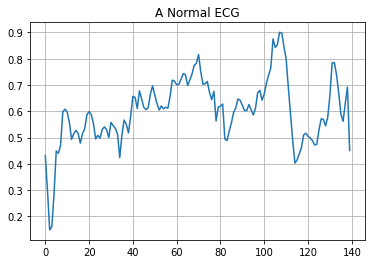

In [7]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

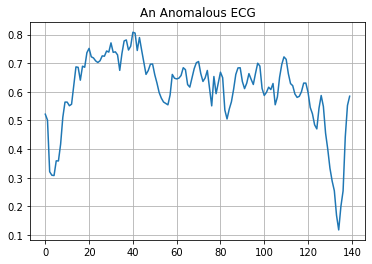

In [8]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

Design  and Train  an  autoencoder  on  the  normal  rhythms  only,  then  use  it  to reconstruct all the data.The autoencoder is trained using only the normal ECGs, but is evaluated using the full test set. 

In [9]:
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import tensorflow as tf

In [10]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [11]:
autoencoder.compile(optimizer='adam', loss='mae')

In [12]:
history = autoencoder.fit(normal_train_data, normal_train_data, epochs=20, batch_size=512,validation_data=(test_data, test_data),shuffle=True)

Epoch 1/20
5/5 [==============================] - 5s 326ms/step - loss: 0.1311 - val_loss: 0.1340
Epoch 2/20
5/5 [==============================] - 0s 100ms/step - loss: 0.1243 - val_loss: 0.1267
Epoch 3/20
5/5 [==============================] - 0s 40ms/step - loss: 0.1156 - val_loss: 0.1184
Epoch 4/20
5/5 [==============================] - 0s 70ms/step - loss: 0.1050 - val_loss: 0.1091
Epoch 5/20
5/5 [==============================] - 0s 30ms/step - loss: 0.0932 - val_loss: 0.0998
Epoch 6/20
5/5 [==============================] - 0s 40ms/step - loss: 0.0813 - val_loss: 0.0916
Epoch 7/20
5/5 [==============================] - 0s 65ms/step - loss: 0.0713 - val_loss: 0.0854
Epoch 8/20
5/5 [==============================] - 0s 31ms/step - loss: 0.0636 - val_loss: 0.0808
Epoch 9/20
5/5 [==============================] - 0s 79ms/step - loss: 0.0582 - val_loss: 0.0780
Epoch 10/20
5/5 [==============================] - 1s 117ms/step - loss: 0.0546 - val_loss: 0.0762
Epoch 11/20
5/5 [=========

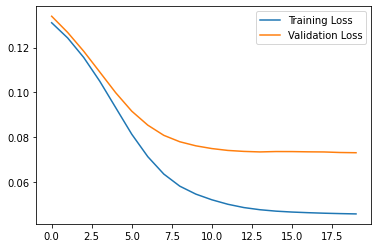

In [13]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

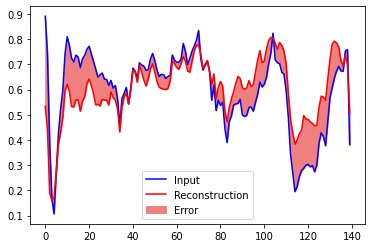

In [14]:
encoded_imgs = autoencoder.encoder(normal_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

plt.plot(normal_test_data[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(140), decoded_imgs[0], normal_test_data[0], color='lightcoral' )
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

Classify an ECG as anomalous if the reconstruction error is greater than one standard deviation from the normal training examples.

74/74 [==============================] - 1s 10ms/step


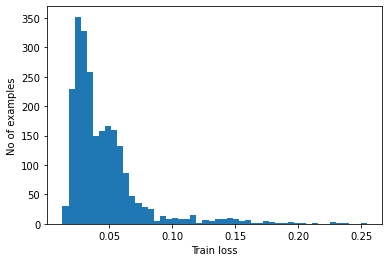

In [15]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [16]:
threshold = np.median(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.06673184221438055


14/14 [==============================] - 0s 4ms/step


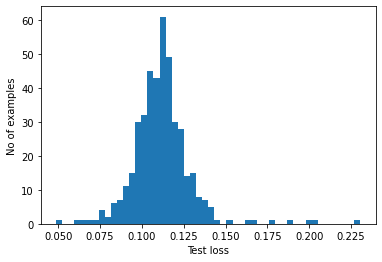

In [17]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss, bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [18]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, preds)))
  print("Precision = {}".format(precision_score(labels, preds)))
  print("Recall = {}".format(recall_score(labels, preds)))

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.929
Precision = 0.9941060903732809
Recall = 0.8815331010452961
